In [1]:
from utilities import *

In [2]:
DATA_PATH = "../Datasets/sit-ups/"
data1 = pd.read_csv(DATA_PATH+'lefthand_normal_4.csv',header = None)
data2 = pd.read_csv(DATA_PATH+'lefthand_abnormal_1.csv',header = None)

# data1

In [23]:
m1 = simplist_filter(get_major_frequency(data1))

In [24]:
start_list,end_list = get_raw_start_end_list(m1)
start_list_edit = get_start_edit(start_list)
end_listd_edit = get_end_edit(end_list)
assert len(start_list_edit) == len(end_listd_edit)

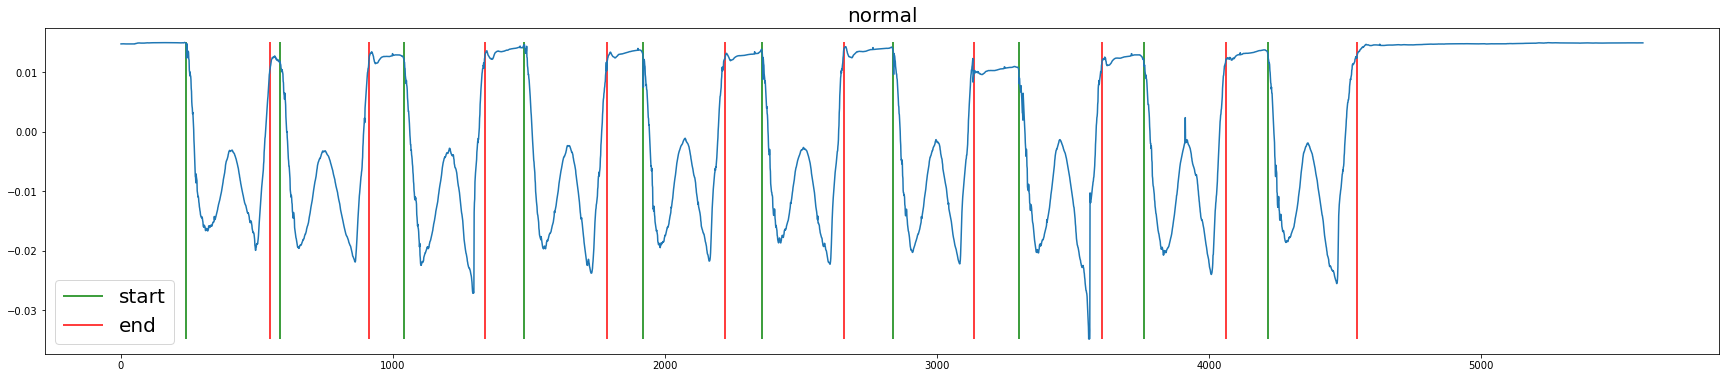

In [25]:
plt.figure(figsize=(30,6))
plt.plot(m1)
plt.vlines(start_list_edit,np.min(m1),np.max(m1),color = "g",label='start')
plt.vlines(end_listd_edit,np.min(m1),np.max(m1),color = "red",label = 'end')
plt.legend(fontsize = 20)
plt.title("normal",fontsize = 20)
plt.show()

In [26]:
# def get_cutted_sequence(m1):
#     start_list,end_list = get_raw_start_end_list(m1)
#     start_list_edit = get_start_edit(start_list)
#     end_listd_edit = get_end_edit(end_list)
#     assert len(start_list_edit) == len(end_listd_edit)
#     cutted_sequence = []
#     for i in range(len(start_list_edit)):
#         cutted_sequence.append(m1[start_list_edit[i]:end_listd_edit[i]])
#     return cutted_sequence
        
    

In [27]:
# get_cutted_sequence(m1)

# data 2

In [28]:
m2 = simplist_filter(get_major_frequency(data2))
start_list2,end_list2 = get_raw_start_end_list(m2)
start_list_edit2 = get_start_edit(start_list2)
end_listd_edit2 = get_end_edit(end_list2)
assert len(start_list_edit2) == len(end_listd_edit2)

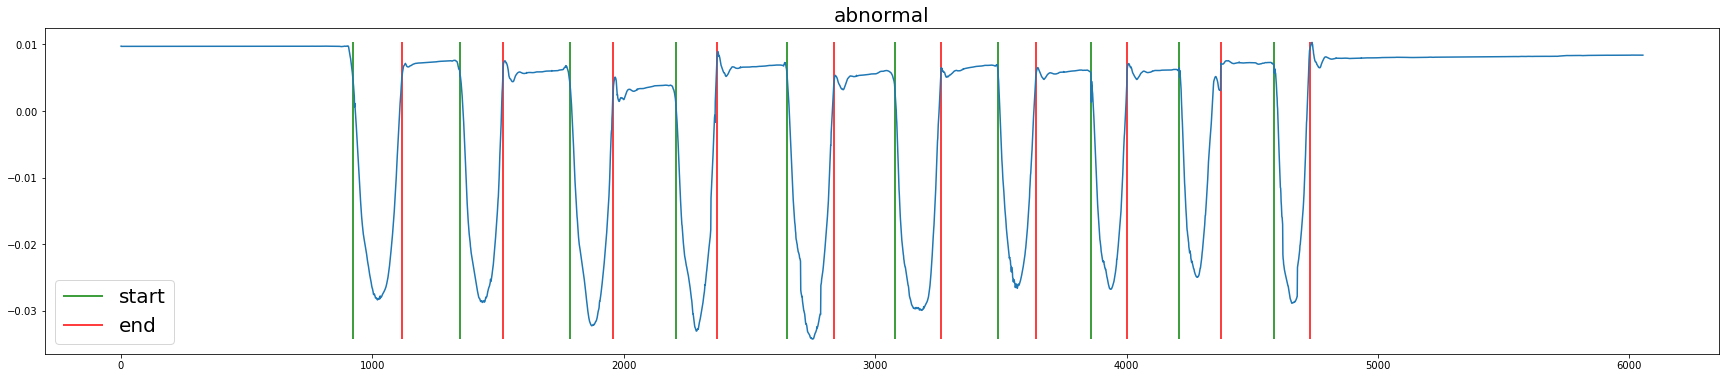

In [29]:
plt.figure(figsize=(30,6))
plt.plot(m2)
plt.vlines(start_list_edit2,np.min(m2),np.max(m2),color = "g",label='start')
plt.vlines(end_listd_edit2,np.min(m2),np.max(m2),color = "red",label = 'end')
plt.legend(fontsize = 20)
plt.title("abnormal",fontsize = 20)
plt.show()

# data 3

In [3]:
data3 = pd.read_csv(DATA_PATH+'lefthand_normal_newtest.csv',header = None)

In [4]:
m3 = simplist_filter(get_major_frequency(data3))

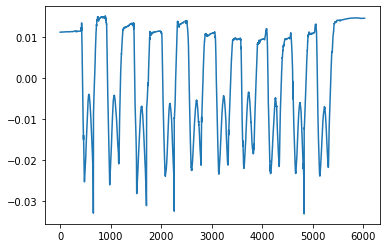

In [5]:
data3 = pd.read_csv(DATA_PATH+'lefthand_normal_newtest.csv',header = None)
data3_= data3.iloc[:,1:]
data3_ = -data3_
dat = data3_.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
mat = np.transpose(np.array(dat))
U,S,VT =np.linalg.svd(mat)
plt.plot(VT[1,:])

In [6]:
m3 = get_major_frequency(-data3)

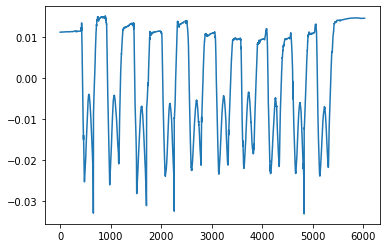

In [7]:
plt.plot(m3)

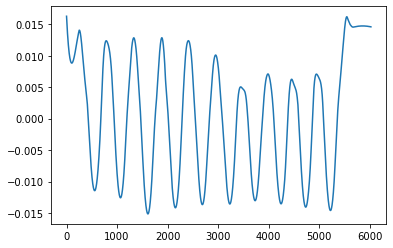

In [8]:
from scipy.signal import savgol_filter
tmp_smooth = savgol_filter(m3,501,3) #501是平滑参数 越大平滑越多
plt.plot(tmp_smooth)

In [17]:
def get_raw_start_end_list(V_test,lim_a=-0.0004,lim_b=0.0004):
    start_list = []
    end_list = []
    for step in range(1,len(V_test)):
        if V_test[step]-V_test[step-1]<lim_a and V_test[step-1]>0 and V_test[step+50] < 0:
            start_list.append(step-1)
        elif V_test[step]-V_test[step-1]>lim_b and V_test[step]>0 and V_test[step-50] < 0:
            end_list.append(step)
    #assert len(step_list)%2 == 0
    start_list = np.array(start_list)
    end_list = np.array(end_list)
    return start_list,end_list

In [30]:
def get_start_edit(start_list_raw):
    start_list = start_list_raw.copy()
    for i in range(len(start_list)):
        if start_list[i] != -1:
            count = 0
            for j in range(i+1,len(start_list)):
                if start_list[j]-start_list[i]<200:
                    count +=1
                    start_list[j] = -1
            if count < 3:
                start_list[i] = -1
    start_list_edit = start_list[np.where(start_list != -1)]
    return start_list_edit

def get_end_edit(end_list_raw):
    end_list = end_list_raw.copy()
    end_list = end_list[::-1]
    for i in range(len(end_list)):
        if end_list[i] != -1:
            count = 0
            for j in range(i+1,len(end_list)):
                if abs(end_list[j]-end_list[i])<200:
                    count +=1
                    end_list[j] = -1
            if count < 3:
                end_list[i] = -1
    end_list_edit = end_list[np.where(end_list != -1)][::-1]
    return end_list_edit

In [31]:
# V_test = m3.copy()
# d_signal = []
# for step in range(1,len(V_test)):
#     d_signal.append(V_test[step]-V_test[step-1])
# start_list = []
# end_list = []
# for step_d in range(len(d_signal)):
#     if d_signal[step_d]<-0.0004 and abs(d_signal[step_d-30])<0.0002:
#          start_list.append(step_d)
#     elif d_signal[step_d]>0.0004 and abs(d_signal[step_d+30])<0.0002:
#         end_list.append(step_d+1)
# start_list3 = np.array(start_list)
# end_list3 = np.array(end_list)
    


In [32]:
start_list3,end_list3 = get_raw_start_end_list(tmp_smooth,lim_a=-0.0001,lim_b=0.0001)
start_list_edit3 = get_start_edit(start_list3)
end_listd_edit3 = get_end_edit(end_list3)

In [33]:
start_list3,end_list3

(array([ 407,  408,  409,  410,  411,  412,  413,  414,  415,  416,  417,
         418,  419,  420,  421,  422,  423,  424,  425,  426,  427,  428,
         429,  891,  892,  893,  894,  895,  896,  897,  898,  899,  900,
         901,  902,  903,  904,  905,  906,  907,  908,  909,  910,  911,
         912,  913,  914,  915,  916,  917,  918,  919,  920,  921,  922,
         923,  924,  925,  926,  927,  928,  929,  930,  931,  932,  933,
         934,  935,  936,  937,  938,  939,  940,  941, 1418, 1419, 1420,
        1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431,
        1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442,
        1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453,
        1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1964,
        1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
        1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
        1987, 1988, 1989, 1990, 1991, 

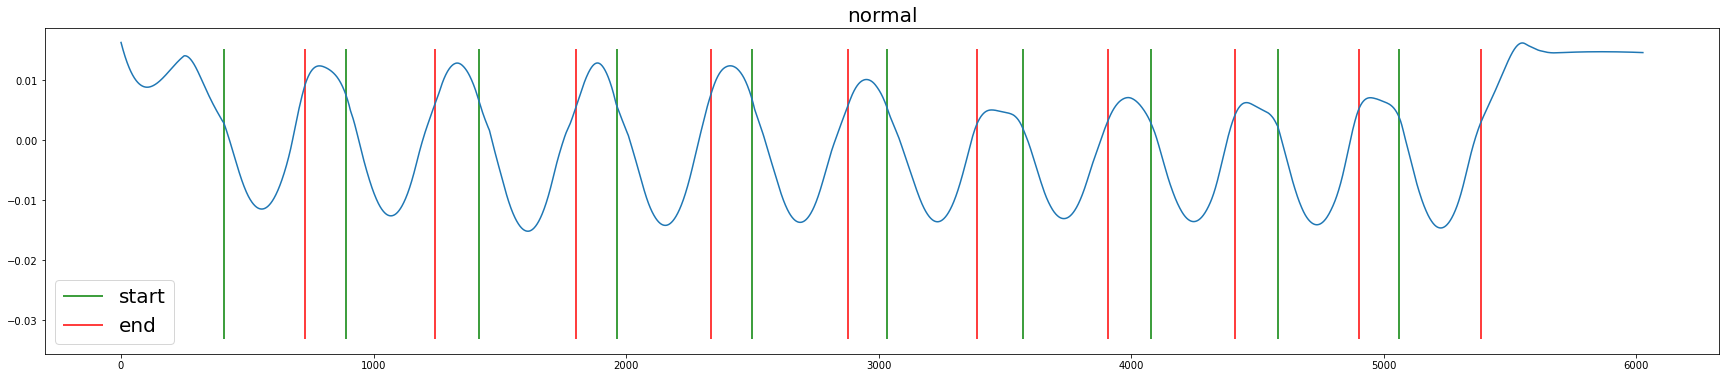

In [34]:
plt.figure(figsize=(30,6))
#plt.plot(d_signal,"pink")
plt.plot(tmp_smooth)
plt.vlines(start_list_edit3,np.min(m3),np.max(m3),color = "g",label='start')
plt.vlines(end_listd_edit3,np.min(m3),np.max(m3),color = "red",label = 'end')
plt.legend(fontsize = 20)
plt.title("normal",fontsize = 20)
plt.show()